<p align="center">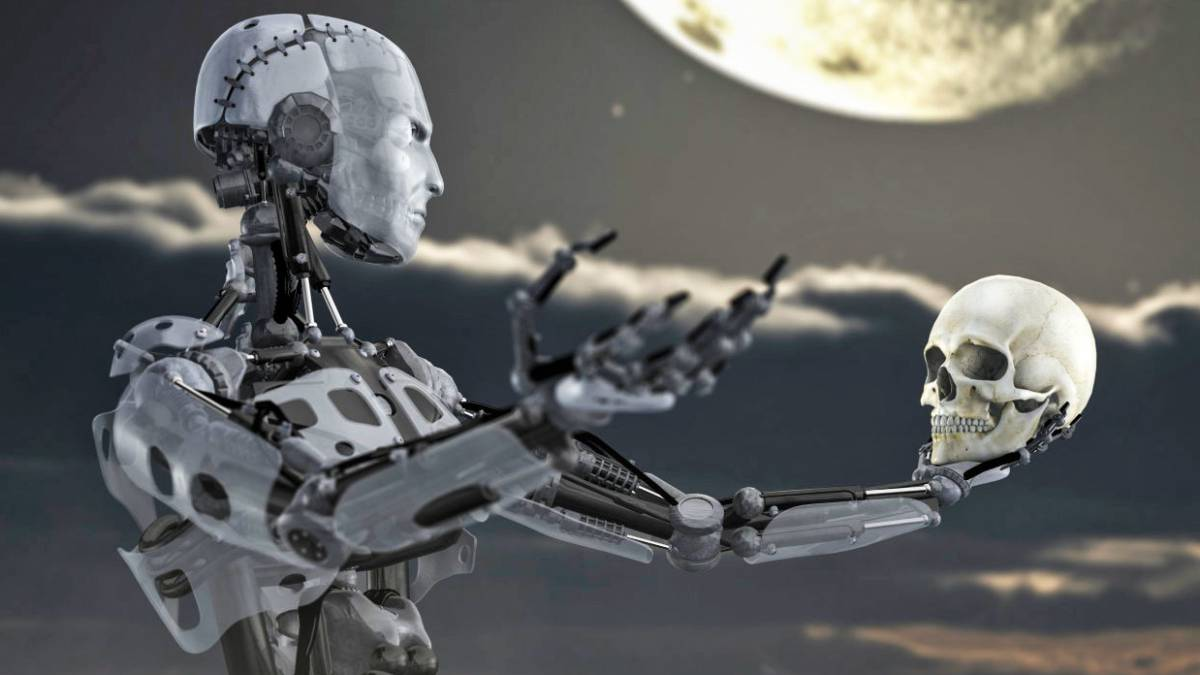</p>

# A little chatbot that answer as Shakespeare

In [ ]:
# Libraries
import io
import random
import string
import warnings
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings('ignore')

In [ ]:
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Adding the text that will be the base to the bot training and answering. In the txt file it is necessary to add the subject information about the chatbot should answer
f=open('alllines2.txt','r',errors = 'ignore')
raw=f.read()
raw = raw.lower()# converts to lowercase

In [ ]:
# Tokenyzing
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

In [ ]:
# Processiong info
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
# greetings functions
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [ ]:
# Bag of words and TF-IDF.
def response(user_response):
    response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        response=response+"I am sorry! I don't understand thou"
        return response
    else:
        response = response+sent_tokens[idx]
        return response

In [ ]:
# Chatting interface function.
flag=True
print("Hi, I'm 'Shakespearito'. If you want to exit, type 'Bye'!")
while(flag==True):
    user_response = input('\nThou response: ')
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("\nShakespearito: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("\nShakespearito: "+greeting(user_response))
            else:
                print("\nShakespearito: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("\nShakespearito: Bye!")

Hi, I'm 'Shakespearito'. If you want to exit, type 'Bye'!

Thou response: hi

Shakespearito: hello

Thou response: your honour

Shakespearito: this is her honour!

Thou response: Peace, peace!

Shakespearito: peace then!

Thou response: you are glad

Shakespearito: i am glad to see you.

Thou response: bye

Shakespearito: Bye!
